In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from torch.optim import SGD

In [ ]:
x = torch.arange(10, 20)
y = torch.arange(30, 40)
x, y

(tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 tensor([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]))

In [ ]:
dataset = TensorDataset(x, y)
dataset

In [ ]:
dataset[0]

(tensor(10), tensor(30))

In [ ]:
dataset.tensors

(tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 tensor([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]))

In [ ]:
dataset.tensors[0]

tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
dataloader = DataLoader(dataset, batch_size=3, shuffle=True) #, drop_last=True
dataloader

In [ ]:
for batch in dataloader:
    print(batch)
    print("*****************")

[tensor([10, 12, 15]), tensor([30, 32, 35])]
*****************
[tensor([16, 17, 19]), tensor([36, 37, 39])]
*****************
[tensor([13, 18, 11]), tensor([33, 38, 31])]
*****************
[tensor([14]), tensor([34])]
*****************


In [ ]:
next(iter(dataloader))

[tensor([19, 18, 12]), tensor([39, 38, 32])]

In [ ]:
salary = pd.read_csv('/content/Salary Data.csv')

torch.Size([28, 1]) torch.Size([28, 1]) torch.Size([12, 1]) torch.Size([12, 1])


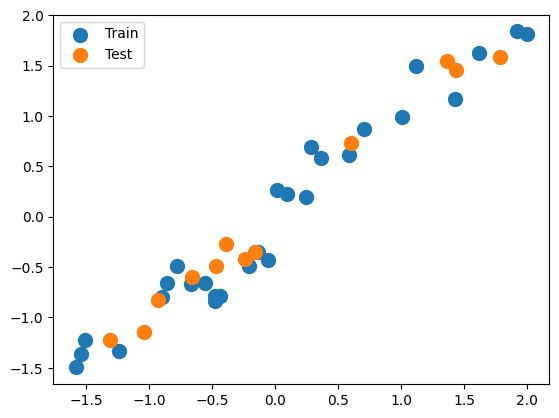

In [ ]:
X = salary['Experience Years'].values
y = salary['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)

X_test = x_scaler.fit_transform(X_test)
y_test = y_scaler.fit_transform(y_test)

plt.scatter(X_train, y_train, s=100)
plt.scatter(X_test, y_test, s=100)
plt.legend(['Train', 'Test'])

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
train_set = TensorDataset(X_train, y_train)
test_set = TensorDataset(X_test, y_test)
train_set[0], test_set[0]

((tensor([0.3615]), tensor([0.5779])), (tensor([0.6007]), tensor([0.7338])))

In [ ]:
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
test_loader = DataLoader(test_set, batch_size=4)

In [ ]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([4, 1]), torch.Size([4, 1]))

In [ ]:
linear_regression = nn.Linear(in_features=1, out_features=1)
linear_regression

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
linear_regression(x_batch)

tensor([[-0.4533],
        [-0.4796],
        [-1.2181],
        [-0.7697]], grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
y_hat = linear_regression(x_batch)
loss = loss_fn(y_hat, y_batch)
loss

tensor(2.9809, grad_fn=<MseLossBackward0>)

In [ ]:
nn.functional.mse_loss(y_hat, y_batch)

tensor(2.9809, grad_fn=<MseLossBackward0>)

In [ ]:
l1 = nn.L1Loss()
l1(y_hat, y_batch)


tensor(1.2100, grad_fn=<MeanBackward0>)

In [ ]:
nn.functional.l1_loss(y_hat, y_batch)

tensor(1.2100, grad_fn=<MeanBackward0>)

In [ ]:
optimizer = SGD(linear_regression.parameters(), lr=0.5, momentum=0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.5
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [ ]:
loss.backward()
print( linear_regression.weight, linear_regression.bias)
print( linear_regression.weight.grad, linear_regression.bias.grad)

Parameter containing:
tensor([[-0.3465]], requires_grad=True) Parameter containing:
tensor([-0.5258], requires_grad=True)
tensor([[-3.6047]]) tensor([-2.3869])


In [ ]:
optimizer.step()
optimizer.zero_grad()
print( linear_regression.weight, linear_regression.bias)
print( linear_regression.weight.grad, linear_regression.bias.grad)

Parameter containing:
tensor([[9.7648]], requires_grad=True) Parameter containing:
tensor([6.1694], requires_grad=True)
None None


## in summary

In [ ]:
x_batch, y_batch = next(iter(train_loader))
y_hat = linear_regression(x_batch)
loss = loss_fn(y_hat, y_batch)
loss.backward()
optimizer.step()
optimizer.zero_grad()

In [ ]:
model = nn.Linear(1, 1)
loss_fn = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
n_epochs = 50
for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        y_hat = model(x_batch)
        loss = loss_fn(y_hat, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(loss.item())

1.0045924186706543
0.06352782994508743
0.1570805311203003
0.2678120732307434
0.0622841939330101
0.02256663329899311
0.08279875665903091
0.09232555329799652
0.042343415319919586
0.09954294562339783
0.024782616645097733
0.07886485010385513
0.023604776710271835
0.037842798978090286
0.008089766837656498
0.08621282875537872
0.05815138667821884
0.05584726482629776
0.017161788418889046
0.052060581743717194
0.07111812382936478
0.027880828827619553
0.019879432395100594
0.0579724945127964
0.07681728154420853
0.033426765352487564
0.05020616948604584
0.06991373747587204
0.07175557315349579
0.06110133230686188
0.03853093087673187
0.09004302322864532
0.04515240713953972
0.08853192627429962
0.02579798549413681
0.015276506543159485
0.050876449793577194
0.03791152685880661
0.004821428097784519
0.0626782476902008
0.0575295053422451
0.07750971615314484
0.05447499081492424
0.04927268624305725
0.05750506371259689
0.027077877894043922
0.05485093593597412
0.08142735064029694
0.10864695906639099
0.13411417603

In [ ]:
model.weight, model.bias

(Parameter containing:
 tensor([[0.9678]], requires_grad=True),
 Parameter containing:
 tensor([-0.0016], requires_grad=True))

In [ ]:
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_hat = model(x_batch)
        error = nn.functional.l1_loss(y_hat, y_batch)
        print(error)

tensor(0.1367)
tensor(0.0594)
tensor(0.1564)
